In [1]:
import matplotlib.pyplot as plt

data = []
with open("quick-sort-1336856.out", "r") as f:
    for line in f:
        line = line.replace("\n", "")
        if line[0] != "[":
            if line[:7] == "Elapsed":
                data += [float(line.split("=")[1])]
                


In [2]:
len(data)

32

In [3]:
# split the list into evenly chuncks
data = [data[i:i + 8] for i in range(0, len(data), 8)]

Text(0.5, 1.0, 'Weak scaling')

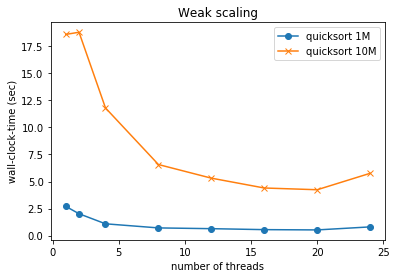

In [4]:
# weak scaling
num_threads = [1, 2, 4, 8, 12, 16, 20, 24]
plt.plot(num_threads, data[0], 'o-', label="quicksort 1M")
plt.plot(num_threads, data[2], 'x-', label="quicksort 10M")
plt.legend()
plt.xlabel("number of threads")
plt.ylabel("wall-clock-time (sec)")
plt.title("Weak scaling")

## Comment for weak scaling for quicksort (the plot above)
In weak scaling, the problem size remains constant while we scale up the number of resources for computing. We see that the plot show a good weak scaling (the more threads, the faster we solve the problem), except a bit increase when n=10M. This might be explained by the overhead of the allocations of new threads. Overall, we see a good 1/p curve as predicted by the Amdahl's law.

Text(0.5, 1.0, 'Strong scaling')

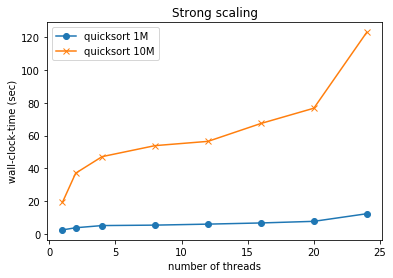

In [5]:
# strong scaling
num_threads = [1, 2, 4, 8, 12, 16, 20, 24]
plt.plot(num_threads, data[1], 'o-', label="quicksort 1M")
plt.plot(num_threads, data[3], 'x-', label="quicksort 10M")
plt.legend()
plt.xlabel("number of threads")
plt.ylabel("wall-clock-time (sec)")
plt.title("Strong scaling")

## Comment for strong scaling for quicksort (the plot above)
In strong scaling, the size of the problem grows in proportion to the number of threads. while for relatively smaller input size (1M), we see that the run time maintains constant. At n=10M, the run time starts to grow out of constant even through the threads also increases. This increase can be explained by the necessary communication between the threads.